<a href="https://colab.research.google.com/github/435wldms/essa/blob/main/20231120_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# * 딥러닝 준비

# 1. 주요 용어

**1-1 하이퍼파라미터**
* 모델을 훈련할 때 사용자가 직접 설정해주는 설정 값


**1-2 과소적합 vs 과대적합**
* 훈련용 데이터와 예측용 데이터로 데이터를 구분하는데, 훈련 데이터에서 패턴 학습을 통해 모델을 완성해나감
* 과소 적합: 모델이 충분히 학습되지 않아 예측 성능이 떨어지는 것
* 과대 적합: 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태

**1-3 에포크**
* 딥러닝은 학습하는 과정을 여러 번 반복하면서 최적의 모델 가중치를 찾는데, 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프를 의미

**1-4 손실 함수**
* 예측 값과 정답 값의 차이 또는 오차를 수치화하는 함수
* 이진 분류: binary crossentropy, 활성화 함수는 sigmoid
* 다중 분류: categorical_crossentropy (one-hot vector의 경우),sparse_categorical_crossentropy (label의 경우), 활성화 함수는 softmax
* 회귀: mse, mae, huber


**1-5 경사하강법**
* 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소 함수 값을 갖도록 하는 방법, 경사하강법을 적용하여 손실함수 값을 최소로 만드는 가중치 찾기


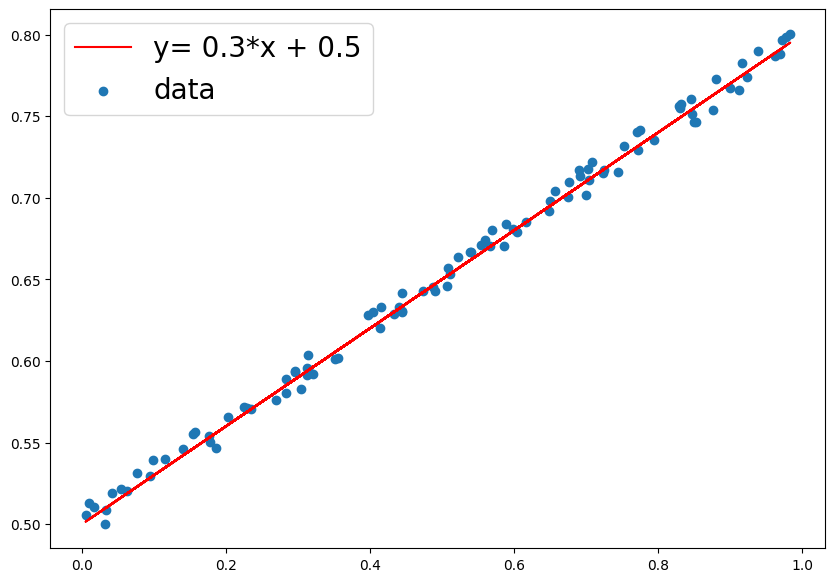

w: 0.3, b: 0.5


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w*x + b
  noise = np.random.uniform(-abs(noise),abs(noise),size=y.shape)
  yy = y + noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r',label=f'y= {w}*x + {b}')
  plt.scatter(x,yy, label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w: {w}, b: {b}')
  return x, yy

x,y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

* w,b에 대한 그레디언트를 구하는 방법 추가
* w,b에 대한 각각의 편미분 값을 구한 뒤 학습률 계수를 곱하여 이전의 w,b로부터 차감

In [4]:
# 최대 반복 횟수
num_epoch=100

# 학습률
learning_rate=0.005

# 에러 기록
errors = []

# random한 값으로 w,b를 초기화
w = np.random.uniform(low=0.0,high=1.0)
b = np.random.uniform(low=0.0,high=1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w*x + b

  # Loss Function 정의
  error = 0.5 * ((y_hat-y)**2).sum()
  if error <0.005:
    break
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat-y)*x).sum()
  b = b - learning_rate * ((y_hat-y)).sum()

  errors.append(error)

  if epoch % 5 ==0:
    print('{0:2}w = {1:.5f}, b= {2:.5f} error = {3:.5f}'.format(epoch,w,b,error))

print('-----'*15)
print('{0:2}w = {1:.5f}, b= {2:.5f} error = {3:.5f}'.format(epoch,w,b,error))

 0w = 0.35563, b= 0.38591 error = 2.80101
 5w = 0.37768, b= 0.45912 error = 0.02873
10w = 0.36626, b= 0.46584 error = 0.02125
15w = 0.35634, b= 0.47123 error = 0.01588
20w = 0.34787, b= 0.47583 error = 0.01198
25w = 0.34064, b= 0.47975 error = 0.00914
30w = 0.33448, b= 0.48309 error = 0.00707
35w = 0.32922, b= 0.48594 error = 0.00557
---------------------------------------------------------------------------
38w = 0.32734, b= 0.48696 error = 0.00487


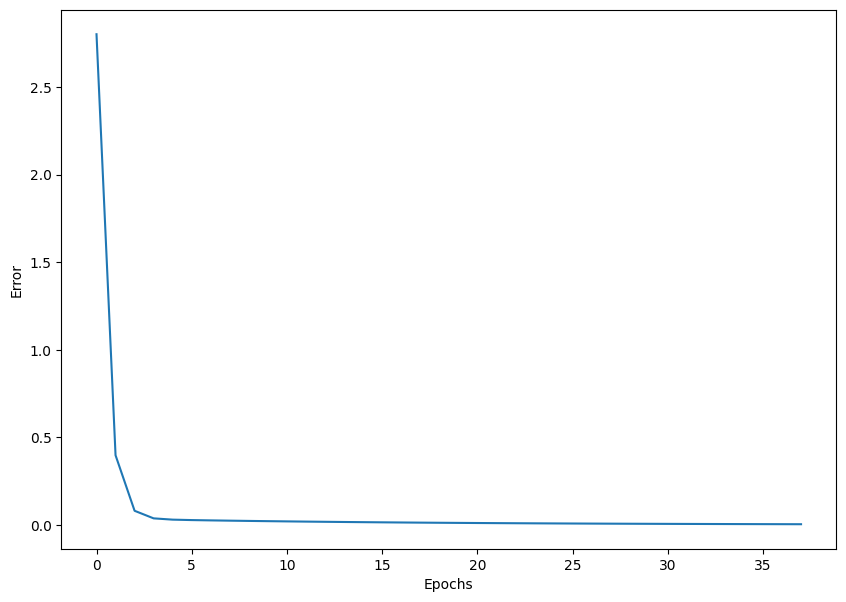

In [5]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

-> 오차 범위 안으로 수렴하여 반복문 종료, 처음 생성한 w,b 값과 비슷한 값으로 종료됨

# 2. 딥러닝 프로세스

1) 데이터 로드
>
2) 데이터 전처리
* 데이터를 가공하는 단계로 배열의 차원 변경, 스케일 조정 등

3) 모델 생성
* 모델의 구조를 정의하고 생성하는 단계

4) 모델 컴파일
* 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 등 정의

5) 모델 훈련
* fit() 함수에 모델 훈련에 필요한 정보를 매개변수로 전달

6) 모델 검증
* 훈련에 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측 값을 정답과 비교해 평가지표 계산
* 반환된 검증 결과를 토대로 다시 모델 수정 및 컴파일, 훈련 과정을 거쳐 재평가하는 과정을 반복

7) 모델 예측
* 훈련, 검증이 완료된 모델로 테스트 데이터 셋에 대하여 모델 예측 및 결과 반환

# * 단순 신경망 훈련

**1-1 선형회귀**

* 하나 이상의 독립 변수들이 종속변수에 미치는 영향을 추정하는 기법
* 텐서플로 케라스를 활용해 단순선형회귀 모델을 만들고 딥러닝 학습 -> 기울기와 절편을 업데이트하면서 종속 변수 y에 가장 근사한 1차 함수식 완성해나감

**1-2 뉴런**
* 인공 신경망 모델을 구성하는 하나의 신경
* 신경망은 여러 개의 레이어를 가지고 1개의 레이어에는 1개 이상의 뉴런 존재
* 뉴런 내부에는 가중치가 존재, 훈련을 진행하면서 오차 역전파(그래디언트를 출력층에서 입력층 순으로 역으로 계산, 저장)를 통해 뉴런 가중치 업데이트함

**1-3 Dense 레이어**
* 심층 신경망 모델을 구성하는 가장 기본 레이어, 각 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에 완전 연결층이라 불림
* Dense 레이어를 구성하는 노드 개수와 활성화 함수 지정

In [6]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

**1-4 데이터셋 만들기**
* 단순선형회귀 모형을 지도학습 방식으로 훈련

In [7]:
# 샘플 데이터셋 생성
x = np.arange(1,6)

# y = 3x+2
y = 3*x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


* 생성한 데이터를 시각화 라이브러리를 활용해 그래프 출력

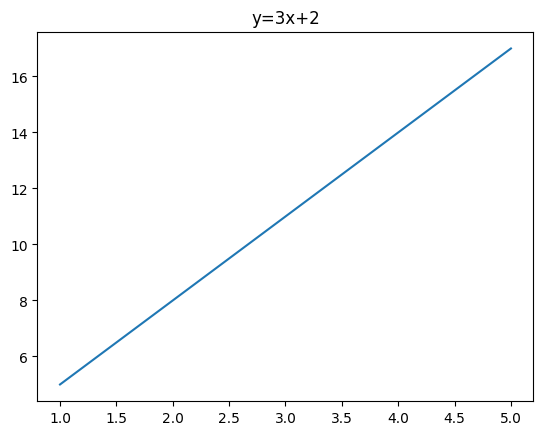

In [8]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x,y)
plt.title('y=3x+2')
plt.show()

**1-5 Sequential API**
* 텐서플로 케라스는 세 방식으로 모델을 생성할 수 있는데 sequential을 사용하면 매우 간결하게 딥러닝 모델을 만들 수 있음 (입력 레이어 ~ 출력 레이어 순서)
* 가장 간단한 방법이지만 2개 이상의 다중 입력이나 출력을 갖는 복잡한 구조를 만들 수 없음

1) 모델 구조
* 두 가지 방법으로 모델 구성 가능
* 첫 번째: 리스트 형 정의로 여러 개의 층 입력, 순차적으로 연산 수행

In [9]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

In [10]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

2) 입력 데이터 형태
* 첫 번째 층은 input_shape 매개 변수를 지정해야함 ( (150,4)의 shape을 가지면 [4]로 지정)

In [11]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

3) 단순선형회귀 모델 정의
* 단순선형회귀 모델은 1개의 뉴런을 가지는 dense 레이어 한 개 사용
* 1차 함수식에서 입력 변수는 1개만 존재하므로 input_shape = [1]

In [12]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # dense 레이어는 use_bias = True가 기본 설정되어 상수항 알아서 추가
])

**1-6 모델 요약**
* 모델의 구조, 층별 노드의 개수 확인

In [13]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


-> trainable params: 모델 훈련 시 업데이트할 파라미터의 총 개수

**1-7 컴파일**
* 모델의 훈련 과정에서 적용할 옵티마이저, 손실 함수, 평가지표 등 정의
* 클래스 인스턴트로 지정 시 하이퍼파라미터를 직접 지정할 수 있고, 문자열로 지정하면 기본값으로 설정된 하이퍼파라미터를 사용해야함

In [14]:
# 긴 문자열 지정
model.compile(optimizer ='sgd', loss='mean_squared_error', metrics=['mean_squared_error','mean_absolute_error'])

In [16]:
# 짧은 문자열 지정
model.compile(optimizer='sgd',loss='mse', metrics=['mse','mae'])

In [17]:
# 클래스 인스턴스 지정
model.compile(optimizer =tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanSquaredError()])

In [18]:
# 최종 컴파일
model.compile(optimizer='sgd',loss='mse', metrics=['mae'])

**1-8 훈련**
* x,y, epoch를 지정해 fit()

In [19]:
# 훈련
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 905ms/step - loss: 42.2783 - mae: 6.1943
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 24.8054 - mae: 4.7876
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 14.6218 - mae: 3.7137
Epoch 4/5
1/1 [==============================] - 0s 18ms/step - loss: 8.6863 - mae: 2.8936
Epoch 5/5
1/1 [==============================] - 0s 27ms/step - loss: 5.2262 - mae: 2.2674


-> loss값이 점점 줄어들고 있으나 아직 횟수가 충분하지 않아 학습이 덜 됨 (과소적합상태)

In [20]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd',loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x,y,epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 346ms/step - loss: 91.1004 - mae: 8.9626
Epoch 2/1200
1/1 [==============================] - 0s 13ms/step - loss: 53.2075 - mae: 6.8916
Epoch 3/1200
1/1 [==============================] - 0s 14ms/step - loss: 31.1246 - mae: 5.3104
Epoch 4/1200
1/1 [==============================] - 0s 14ms/step - loss: 18.2550 - mae: 4.1032
Epoch 5/1200
1/1 [==============================] - 0s 11ms/step - loss: 10.7544 - mae: 3.1815
Epoch 6/1200
1/1 [==============================] - 0s 16ms/step - loss: 6.3827 - mae: 2.4777
Epoch 7/1200
1/1 [==============================] - 0s 17ms/step - loss: 3.8343 - mae: 1.9403
Epoch 8/1200
1/1 [==============================] - 0s 12ms/step - loss: 2.3484 - mae: 1.5299
Epoch 9/1200
1/1 [==============================] - 0s 11ms/step - loss: 1.4817 - mae: 1.2164
Epoch 10/1200
1/1 [==============================] - 0s 11ms/step - loss: 0.9759 - mae: 0.9770
Epoch 11/1200
1/1 [==============================] - 

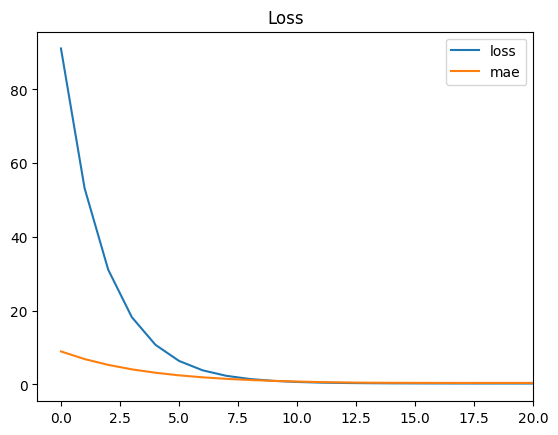

In [21]:
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각회
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['mae'],label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

-> 모델 초기 훈련 단계에는 학습이 매우 빠르게 진행, 일정 epoch 이후에는 학습 속도가 느려짐

**1-9 검증**
* evaluate() 메서드로 모델의 성능 검증

In [22]:
model.evaluate(x,y)

1/1 [==============================] - 1s 537ms/step - loss: 8.5351e-05 - mae: 0.0079


[8.535053348168731e-05, 0.007929611019790173]

-> 모델이 훈련을 마친 상태의 가중치를 그대로 적용해 손실, 평가지표를 계산

**1-10 예측**
* predict() 메소드에 입력 데이터를 넣어 예측값 얻기

In [23]:
model.predict([10])

1/1 [==============================] - 0s 153ms/step


array([[32.038322]], dtype=float32)

-> 예측값: 32.038322로 실제값 32와 아주 근사함

# * 심층 신경망으로 이미지 분류

**1-1 케라스 내장 데이터셋 로드**
* load_data() 메서드를 통해 데이터 불러옴

In [1]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
# 로드된 데이터셋 확인
print('train set :', x_train.shape, y_train.shape)
print('test set :', x_test.shape, y_test.shape)

train set : (60000, 28, 28) (60000,)
test set : (10000, 28, 28) (10000,)


-> 훈련 셋에는 60000개 데이터, 검증 셋에는 10000개 데이터 존재
>
-> shape=(데이터셋 크기, 28, 28)

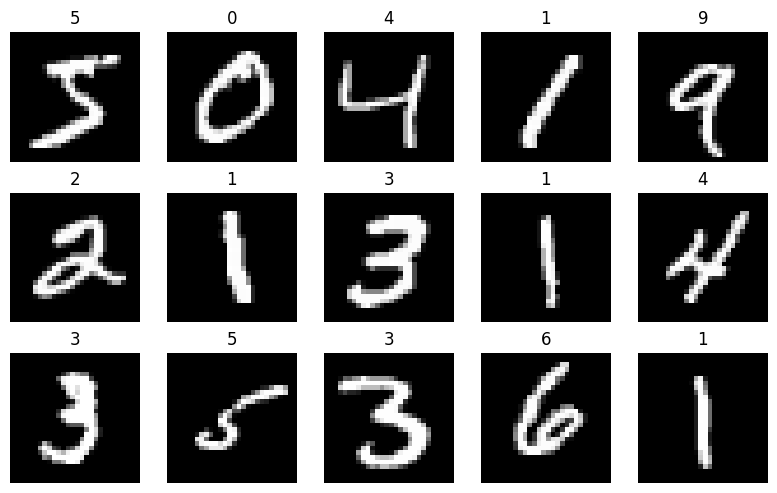

In [3]:
# 처음 15장 이미지 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig,axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i],cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

**1-2 데이터 전처리**
* 정규화를 통해 데이터 범위 조절
* x_train은 넘파이 배열인데 배열의 각 워소는 이미지를 구성하는 하나의 픽셀 값과 일대일 매칭

In [4]:
# x_train 배열의 데이터 확인
x_train[0,10:15,10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [5]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 전] 최소값: 0.0, 최대값: 1.0


In [6]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [7]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0,10:15,10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

* 정규화하는 이유: 입력 데이터가 정규화되어 있으면 학습할 때 경사하강법 알고리즘에 의한 수렴 속도가 비정규화되어 있을 때보다 빠르기 때문

**1-3 Flatten 레이어**
* 샘플 이미지의 형태는 (28,28) 형태로 2차원 but Dense 레이어에는 1차원 배열이 들어가야하므로 1차원으로 데이터 전처리

In [8]:
print(f'변경 전 shape: {x_train.shape}')
print(f'ID으로 shape 변경 후: {x_train.reshape(60000,-1).shape}')

변경 전 shape: (60000, 28, 28)
ID으로 shape 변경 후: (60000, 784)


In [9]:
# Flatten 레이어를 사용해 다차원 데이터를 1차원으로 펼치기
print(f'변경 전 shape: {x_train.shape}')
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


**1-4 활성화 함수**
* 입력을 비선형 출력으로 변환해주는 함수
* Sigmoid, tanh, ReLU

In [10]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128,activation='relu')

In [11]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation('relu') # 배치 정규화를 적용한 후 활성화 함수를 적용할 때 많이 사용
])

**1-5 입력과 출력**
* 첫 번째 레이어에 입력 데이터의 형태를 나타내는 input_shape 매개변수를 지정 (28,28)
* 마지막 레이어는 출력층인데, 출력층 노드 개수는 클래스 개수가 되어야 함

In [13]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(32,activation='relu'),
        # 노드 = 10개 (클래스 개수와 동일)
        tf.keras.layers.Dense(10,activation='softmax')
])

-> 레이어를 구성하는 노드의 개수가 점점 줄어드는데, 이는 노드 개수를 조금씩 줄여가면서 최종 출력 클래스 개수값까지 줄여나간것 (정답은 없음)
* 출력층의 노드 개수가 '2개' 이상인 경우 (다중 분류 문제) softmax 활성화 함수 적용, 이진 분류 모델이면서 출력층 노드 개수를 '1개'로 설정한 경우 sigmoid 활성화 함수 적용

In [14]:
# 출력층 노드 =1인 경우, sigmoid
tf.keras.layers.Dense(1,activation='sigmoid')
# 출력층 노드 =2개 이상인 경우, softmax
tf.keras.layers.Dense(10,activation='softmax')

**1-6 손실 함수**
* 출력층의 노드 개수가 1개 loss function: binary_crossentropy
* 출력층의 노드 개수가 '2개' 이상 & 원 핫 벡터, loss function: categorical_crossentropy
* 출력층의 노드 개수가 '2개' 이상 & 원 핫 벡터가 아닌 경우, loss function: sparse_categorical_crossentropy

In [15]:
# 이진 분류 (출력 노드 개수 =1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [16]:
# y가 원핫 벡터이면서 출력 노드 개수가 2 이상
model.compile(loss='categorical_crossentropy')

# y가 원핫 벡터가 아니면서 출력 노드 개수가 2이상
model.compile(loss='sparse_categorical_crossentropy')

**1-7 옵티마이저**
* 손실을 낮추기 위해서 신경망의 가중치와 학습률 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법, 주로 Adam이 좋은 성능을 발휘함

In [18]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

**1-8 평가 지표**
* accuracy, auc, precision, recall 등
* 모델 컴파일 단계에서 metrics 매개변수에 파이썬 리스트 형태로 하나 이상의 평가지표를 지정하여 여러 지표 동시에 참고 가능

In [19]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=[acc])

In [20]:
# 문자열로 지정
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**1-9 훈련**
* 모델 훈련 시 검증 셋을 추가 지정하면 매 epoch마다 훈련 손실과 검증 손실, 각 셋에 대한 평가 지표 출력

In [21]:
# 훈련
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data = (x_test,y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2271 - accuracy: 0.9325 - val_loss: 0.1339 - val_accuracy: 0.9593
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0923 - accuracy: 0.9711 - val_loss: 0.0908 - val_accuracy: 0.9700
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0662 - accuracy: 0.9797 - val_loss: 0.0937 - val_accuracy: 0.9705
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0473 - accuracy: 0.9850 - val_loss: 0.0867 - val_accuracy: 0.9743
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0413 - accuracy: 0.9866 - val_loss: 0.0810 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0315 - accuracy: 0.9897 - val_loss: 0.0882 - val_accuracy: 0.9759
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0266 - accuracy: 0.9911 - val_loss: 0.0955 - val_accuracy

**1-10 평가**
* evaluate() 메소드로 모델 성능을 검증하고 평가 결과 확인 가능

In [22]:
# 검증
test_loss, test_acc = model.evaluate(x_test,y_test)
print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 0s 2ms/step - loss: 0.0880 - accuracy: 0.9794
검증 셋 정확도: 0.9793999791145325


-> 컴파일 단계에서 지정한 손실과 정확도 확인

**1-11 예측**


In [23]:
# 예측
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [24]:
# 예측 결과 출력
predictions[0]

array([2.5998682e-12, 1.4478849e-07, 9.1576496e-08, 2.3257061e-09,
       4.3019980e-11, 1.5031812e-10, 3.3400376e-11, 9.9999970e-01,
       1.0466918e-12, 2.9770184e-09], dtype=float32)

-> 마지막 출력층 노드 개수가 10이므로 10개 값 출력
>
-> 10개의 개별 클래스에 대한 분류 확률값, 가장 높은 값으로 분류함

In [25]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10],axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


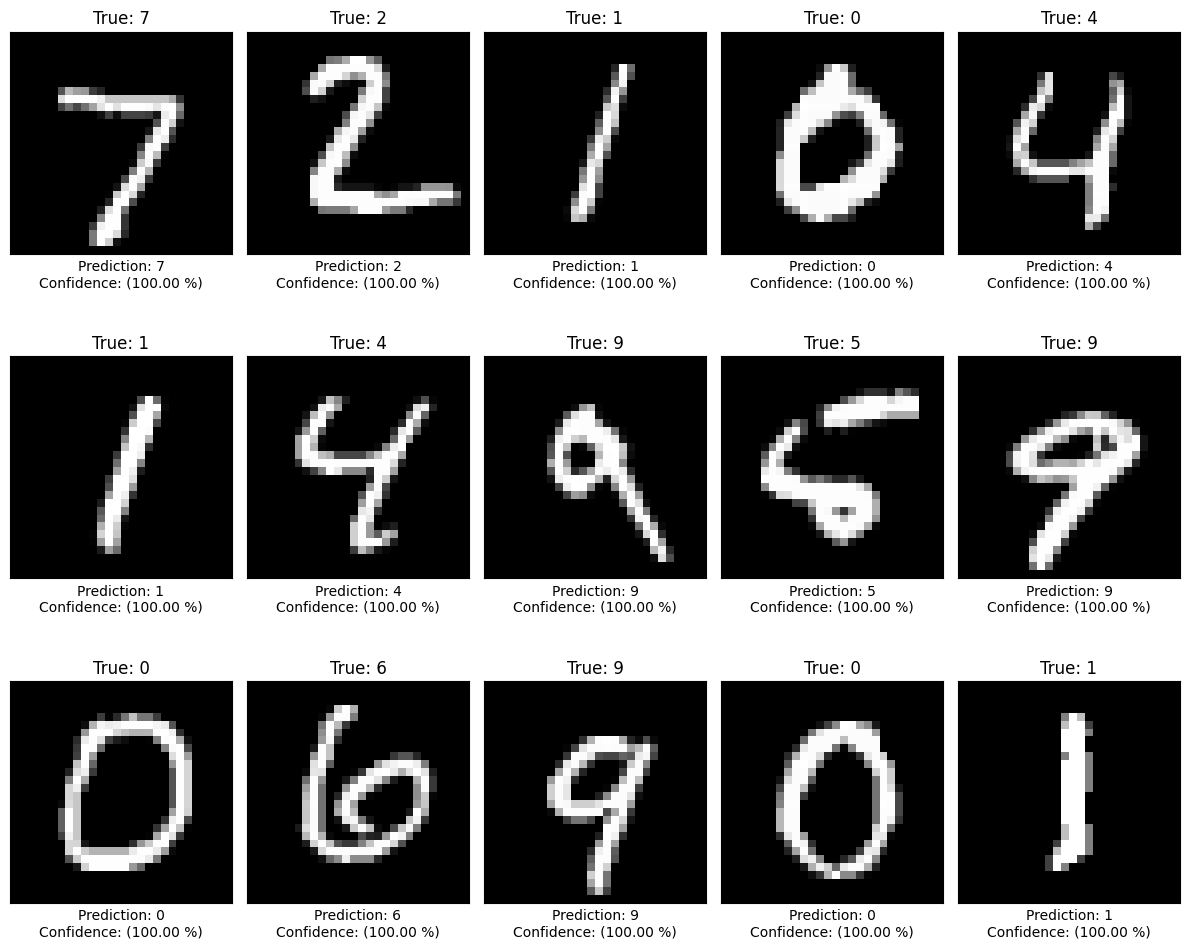

In [26]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img,y_true,y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)
for i in range(15):
  ax = axes[i//5,i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  #imshow로 이미지 시각화
  ax.imshow(img,cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()